# Data - Model exploration

## Imports

In [2]:
import numpy as np
import pandas as pd

import pickle

## Import data base and transform

In [86]:
df = pd.read_csv('../raw_data/KM_test.csv').drop(columns=['Unnamed: 0', 'datum', 'arrTime', 'start_or_endpoint', 
                                                          'depTime', 'zugnr', 'bhf', 'ddelay', 'arrTime_clean', 
                                                          'depTime_clean', 'dwpt', 'rhum', 'wdir', 'pres', 'tsun'])
df.rename(columns={'date': 'expected_atime'}, inplace=True)
df.head()

,adelay,city,expected_atime,sharp_date,temp,prcp,snow,wspd,wpgt,coco
0,0,Köln,2019-12-15 19:06:00,2019-12-15 19:00:00,6.9,0.0,NaN,13.3,21.0,4.0
1,10,Köln,2019-12-16 19:06:00,2019-12-16 19:00:00,8.7,0.0,NaN,11.5,18.0,4.0
2,47,Köln,2019-12-17 19:06:00,2019-12-17 19:00:00,14.8,0.0,NaN,18.4,30.0,4.0
3,-1,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,NaN,17.3,28.0,2.0
4,29,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,NaN,17.3,28.0,2.0


In [87]:
df['snow'] = df['snow'].replace(np.nan, 0)

In [88]:
df['snow'].value_counts().sum()

130279

In [89]:
df['snow'].unique()

array([  0.,  30.,  60.,  70.,  50.,  40.,  20.,  10.,  90., 150., 130.,
       160.,  80., 170., 120., 140., 180., 100., 110.])

In [90]:
df.nunique()

adelay               218
city                   2
expected_atime    120173
sharp_date         20110
temp                 460
prcp                 105
snow                  19
wspd                 128
wpgt                 126
coco                  20
dtype: int64

In [91]:
df.head()

,adelay,city,expected_atime,sharp_date,temp,prcp,snow,wspd,wpgt,coco
0,0,Köln,2019-12-15 19:06:00,2019-12-15 19:00:00,6.9,0.0,0.0,13.3,21.0,4.0
1,10,Köln,2019-12-16 19:06:00,2019-12-16 19:00:00,8.7,0.0,0.0,11.5,18.0,4.0
2,47,Köln,2019-12-17 19:06:00,2019-12-17 19:00:00,14.8,0.0,0.0,18.4,30.0,4.0
3,-1,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,2.0
4,29,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,2.0


In [92]:
coco = pd.read_csv('../raw_data/weather_coco.csv', sep=';')
coco.set_index('Code', inplace=True)
coco = coco.to_dict()['Weather Condition']
coco

{1: 'Clear',
 2: 'Fair',
 3: 'Cloudy',
 4: 'Overcast',
 5: 'Fog',
 6: 'Freezing Fog',
 7: 'Light Rain',
 8: 'Rain',
 9: 'Heavy Rain',
 10: 'Freezing Rain',
 11: 'Heavy Freezing Rain',
 12: 'Sleet',
 13: 'Heavy Sleet',
 14: 'Light Snowfall',
 15: 'Snowfall',
 16: 'Heavy Snowfall',
 17: 'Rain Shower',
 18: 'Heavy Rain Shower',
 19: 'Sleet Shower',
 20: 'Heavy Sleet Shower',
 21: 'Snow Shower',
 22: 'Heavy Snow Shower',
 23: 'Lightning',
 24: 'Hail',
 25: 'Thunderstorm',
 26: 'Heavy Thunderstorm',
 27: 'Storm'}

In [93]:
new_classes = {
    'good': [1, 2],
    'medium': [3, 4, 7, 14],
    'bad': [5, 8, 10, 12, 15, 17, 19, 21, 23, 24, 25],
    'extreme': [6, 9, 11, 13, 16, 18, 20, 22, 26, 27]
}

In [94]:
reclass = {}
for k, values in new_classes.items():
    for v in values:
        for c in range(1, 28):
            if v == c:
                reclass[v] = k

reclass = dict(sorted(reclass.items()))
reclass

{1: 'good',
 2: 'good',
 3: 'medium',
 4: 'medium',
 5: 'bad',
 6: 'extreme',
 7: 'medium',
 8: 'bad',
 9: 'extreme',
 10: 'bad',
 11: 'extreme',
 12: 'bad',
 13: 'extreme',
 14: 'medium',
 15: 'bad',
 16: 'extreme',
 17: 'bad',
 18: 'extreme',
 19: 'bad',
 20: 'extreme',
 21: 'bad',
 22: 'extreme',
 23: 'bad',
 24: 'bad',
 25: 'bad',
 26: 'extreme',
 27: 'extreme'}

In [95]:
df['coco'] = df['coco'].map(reclass)

In [96]:
df

,adelay,city,expected_atime,sharp_date,temp,prcp,snow,wspd,wpgt,coco
0,0,Köln,2019-12-15 19:06:00,2019-12-15 19:00:00,6.9,0.0,0.0,13.3,21.0,medium
1,10,Köln,2019-12-16 19:06:00,2019-12-16 19:00:00,8.7,0.0,0.0,11.5,18.0,medium
2,47,Köln,2019-12-17 19:06:00,2019-12-17 19:00:00,14.8,0.0,0.0,18.4,30.0,medium
3,-1,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good
4,29,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good
...,...,...,...,...,...,...,...,...,...,...
130274,0,München,2022-05-11 07:11:00,2022-05-11 07:00:00,19.8,0.0,0.0,9.4,18.0,medium
130275,21,München,2022-05-12 07:11:00,2022-05-12 07:00:00,21.4,0.0,0.0,15.5,32.0,medium
130276,0,München,2022-05-13 07:11:00,2022-05-13 07:00:00,15.8,0.7,0.0,5.8,12.0,bad
130277,0,München,2022-05-14 07:11:00,2022-05-14 07:00:00,15.4,0.0,0.0,2.2,5.0,medium


## Set up a primary model

In [98]:
#1) into several categories
# adelay-> into categories: no delay, small delay, medium delay, (big delay/cancellation)
max = df.adelay.max()
bins = [-2, -0.1, 0, 5, 30, max]
group_names = ['large delay/cancelled','on time','small delay', 'medium delay', 'large delay/cancelled']
df['target'] = pd.cut(df['adelay'], bins, labels=group_names, ordered=False)

#value counts of target:
#on time                  67336
#small delay              28649
#medium delay             23617
#large delay/cancelled    10677

#2) binary target (on time - or not)
df['target_binary'] =  (df['adelay'] == 0)*1

#3) numeric target (cancelled and extreme values = 120 Min)
df['target_numeric'] = df['adelay']
df['target_numeric'] = np.where(df['target_numeric'] == -1, 120, df['target_numeric'])
df['target_numeric'] = np.where(df['target_numeric'] > 120, 120, df['target_numeric'])
#sns.boxplot(df['target_numeric'])

In [99]:
df

,adelay,city,expected_atime,sharp_date,temp,prcp,snow,wspd,wpgt,coco,target,target_binary,target_numeric
0,0,Köln,2019-12-15 19:06:00,2019-12-15 19:00:00,6.9,0.0,0.0,13.3,21.0,medium,on time,1,0
1,10,Köln,2019-12-16 19:06:00,2019-12-16 19:00:00,8.7,0.0,0.0,11.5,18.0,medium,medium delay,0,10
2,47,Köln,2019-12-17 19:06:00,2019-12-17 19:00:00,14.8,0.0,0.0,18.4,30.0,medium,large delay/cancelled,0,47
3,-1,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good,large delay/cancelled,0,120
4,29,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good,medium delay,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130274,0,München,2022-05-11 07:11:00,2022-05-11 07:00:00,19.8,0.0,0.0,9.4,18.0,medium,on time,1,0
130275,21,München,2022-05-12 07:11:00,2022-05-12 07:00:00,21.4,0.0,0.0,15.5,32.0,medium,medium delay,0,21
130276,0,München,2022-05-13 07:11:00,2022-05-13 07:00:00,15.8,0.7,0.0,5.8,12.0,bad,on time,1,0
130277,0,München,2022-05-14 07:11:00,2022-05-14 07:00:00,15.4,0.0,0.0,2.2,5.0,medium,on time,1,0


In [100]:
import seaborn as sns

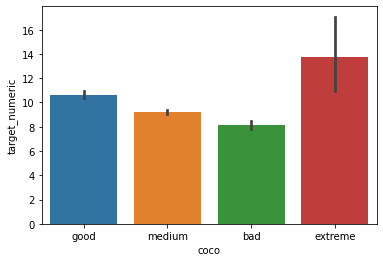

In [114]:
sns.barplot(x= df.coco, y=df.target_numeric, order=['good', 'medium', 'bad', 'extreme']);

In [102]:
df.corr()

,adelay,temp,prcp,snow,wspd,wpgt,target_binary,target_numeric
adelay,1.000000,0.035456,0.009153,0.002403,0.016502,0.009684,-0.378675,0.470969
temp,0.035456,1.000000,-0.000654,-0.179724,-0.011773,0.044190,-0.077239,0.039145
prcp,0.009153,-0.000654,1.000000,0.006795,0.062647,0.092913,-0.007932,0.008669
snow,0.002403,-0.179724,0.006795,1.000000,0.015005,0.021254,0.037907,-0.002037
wspd,0.016502,-0.011773,0.062647,0.015005,1.000000,0.897267,-0.072883,0.031847
wpgt,0.009684,0.044190,0.092913,0.021254,0.897267,1.000000,-0.038754,0.023157
target_binary,-0.378675,-0.077239,-0.007932,0.037907,-0.072883,-0.038754,1.000000,-0.408556
target_numeric,0.470969,0.039145,0.008669,-0.002037,0.031847,0.023157,-0.408556,1.000000


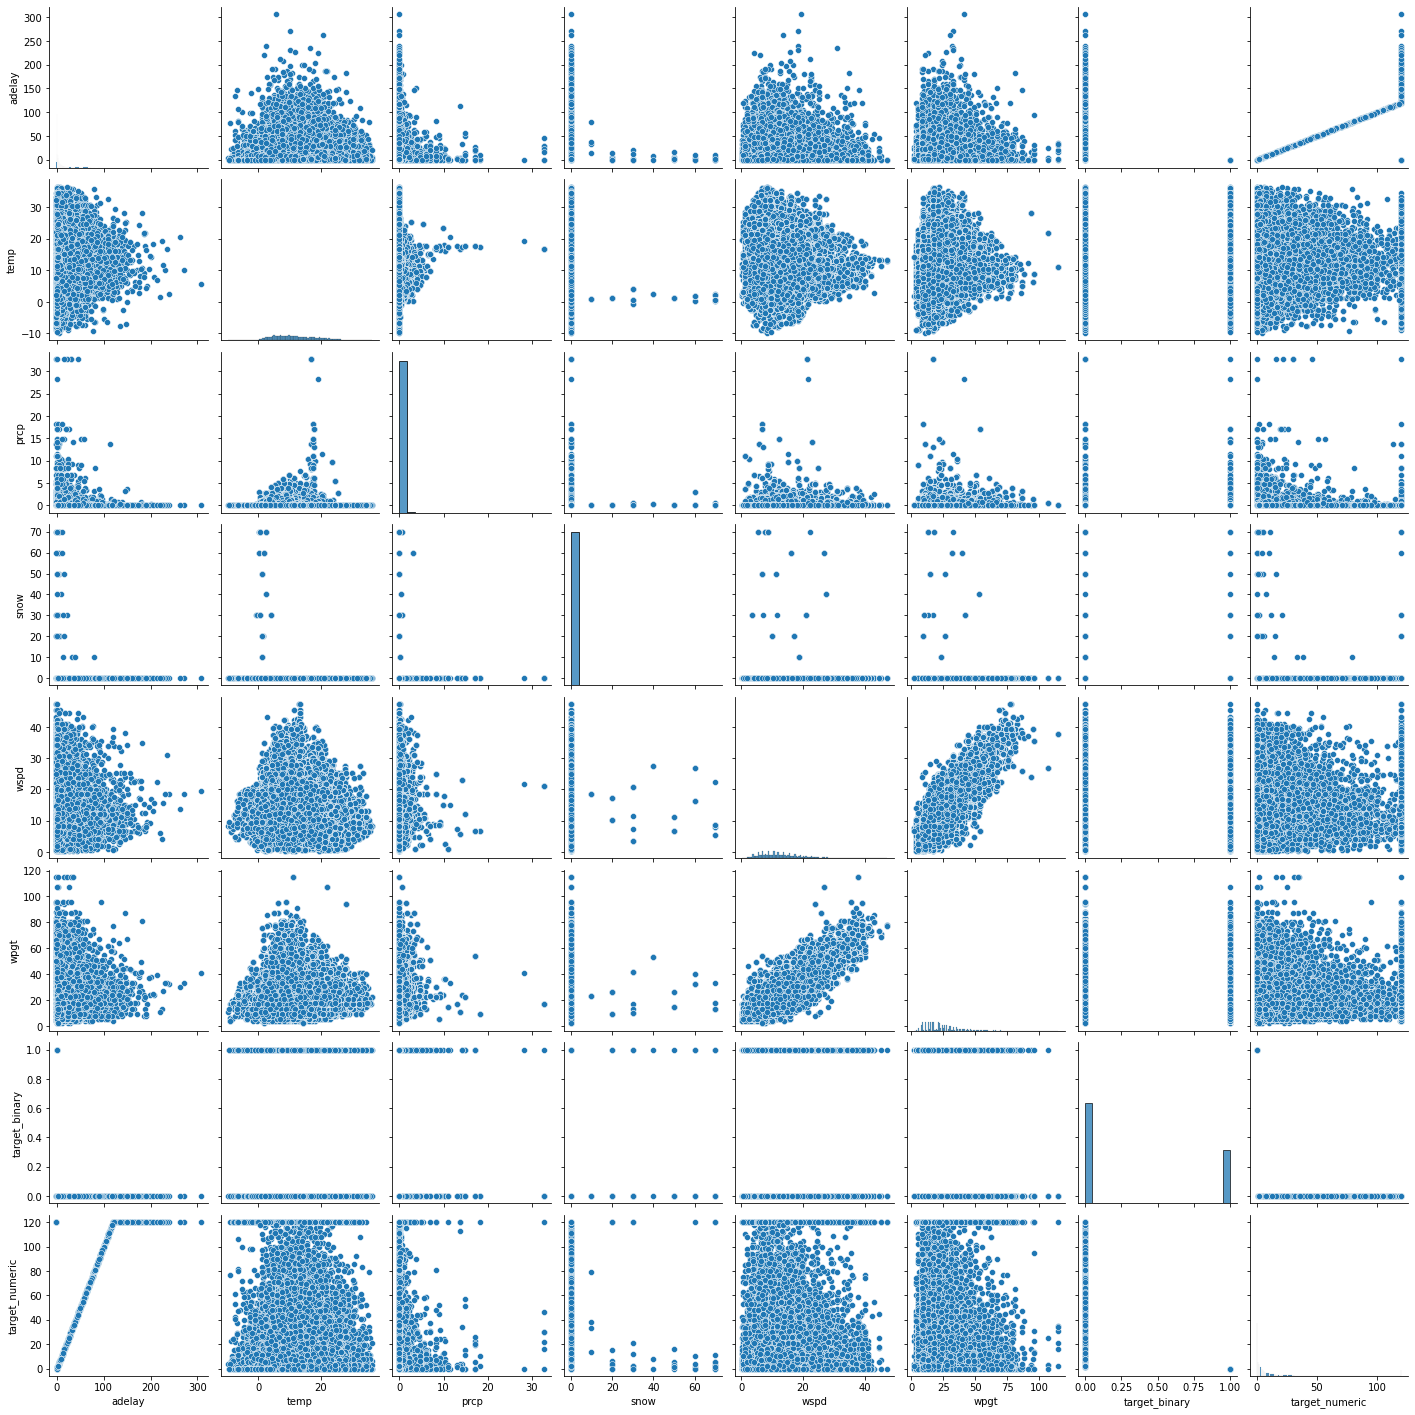

In [110]:
sns.pairplot(df[df['city'] == 'Köln']);

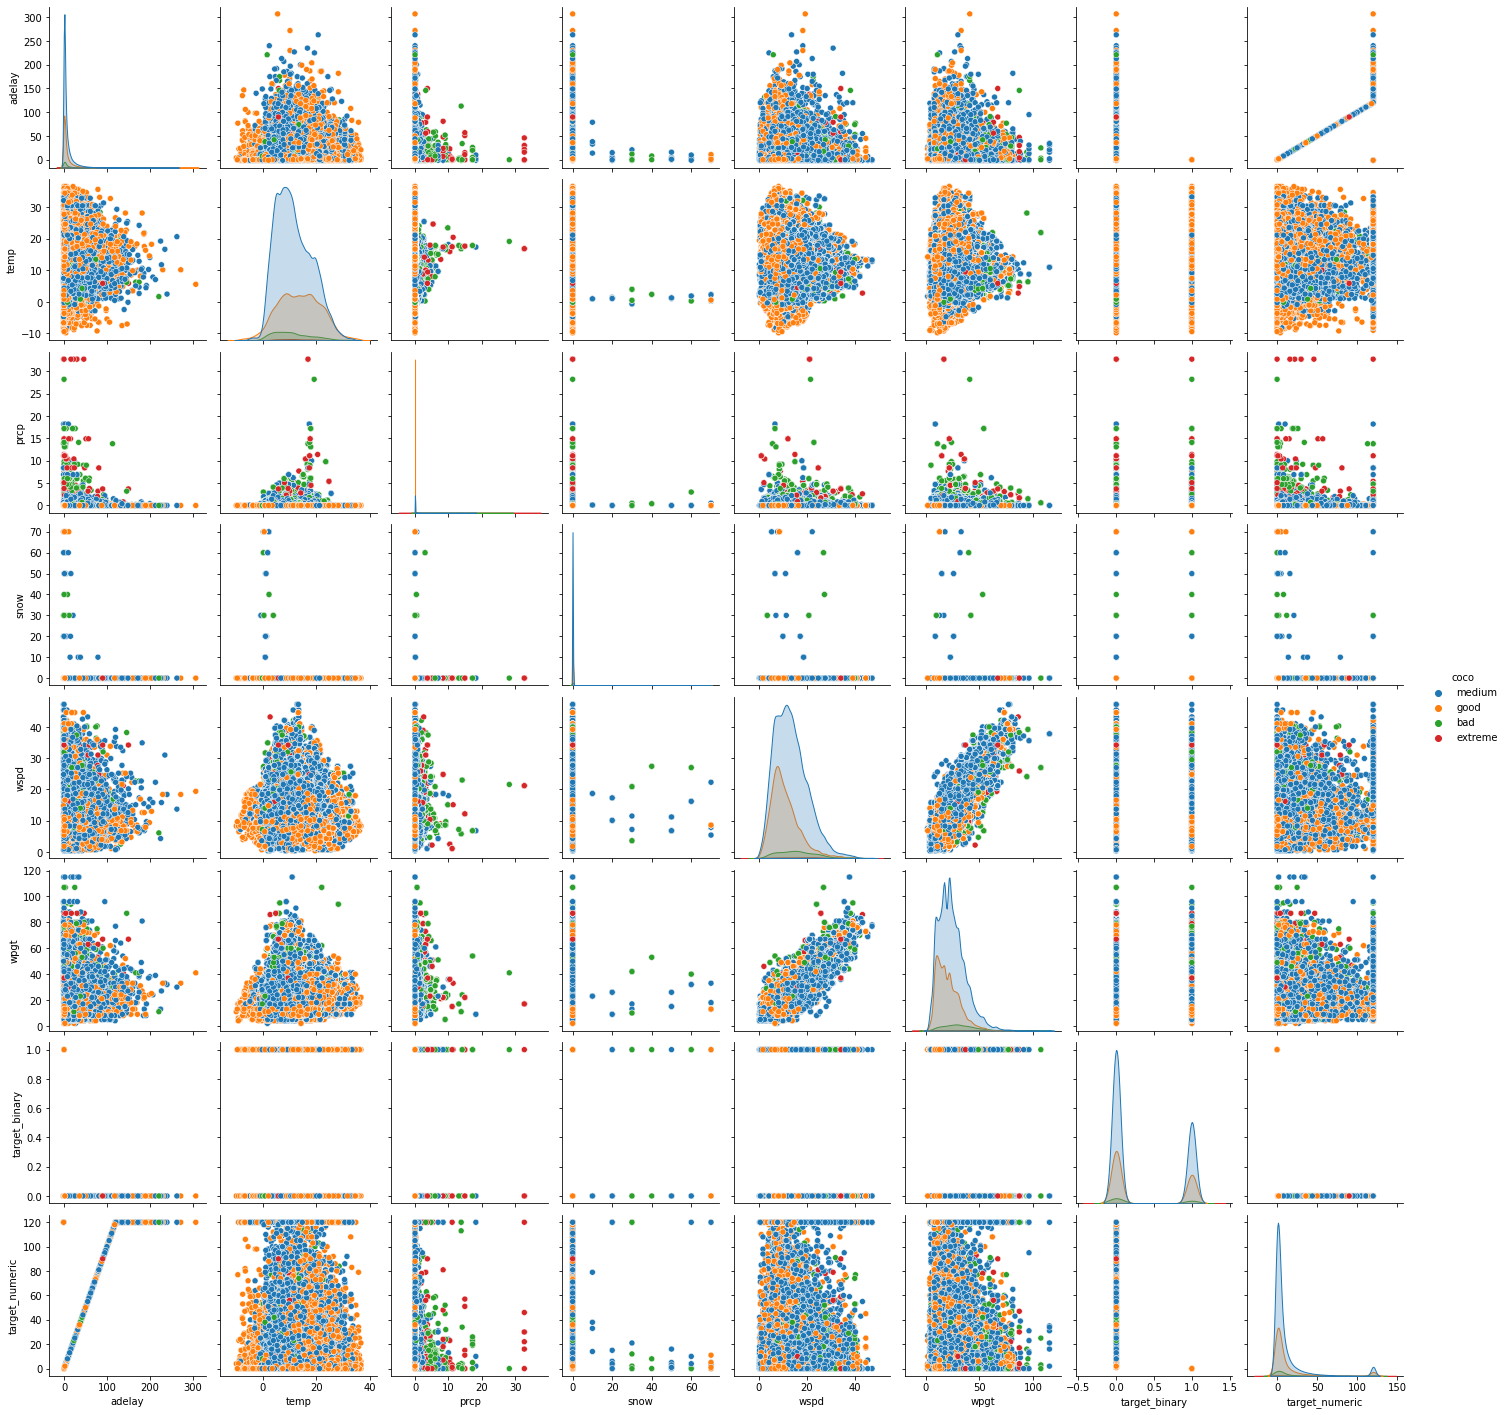

In [111]:
sns.pairplot(df[df['city'] == 'Köln'], hue='coco');

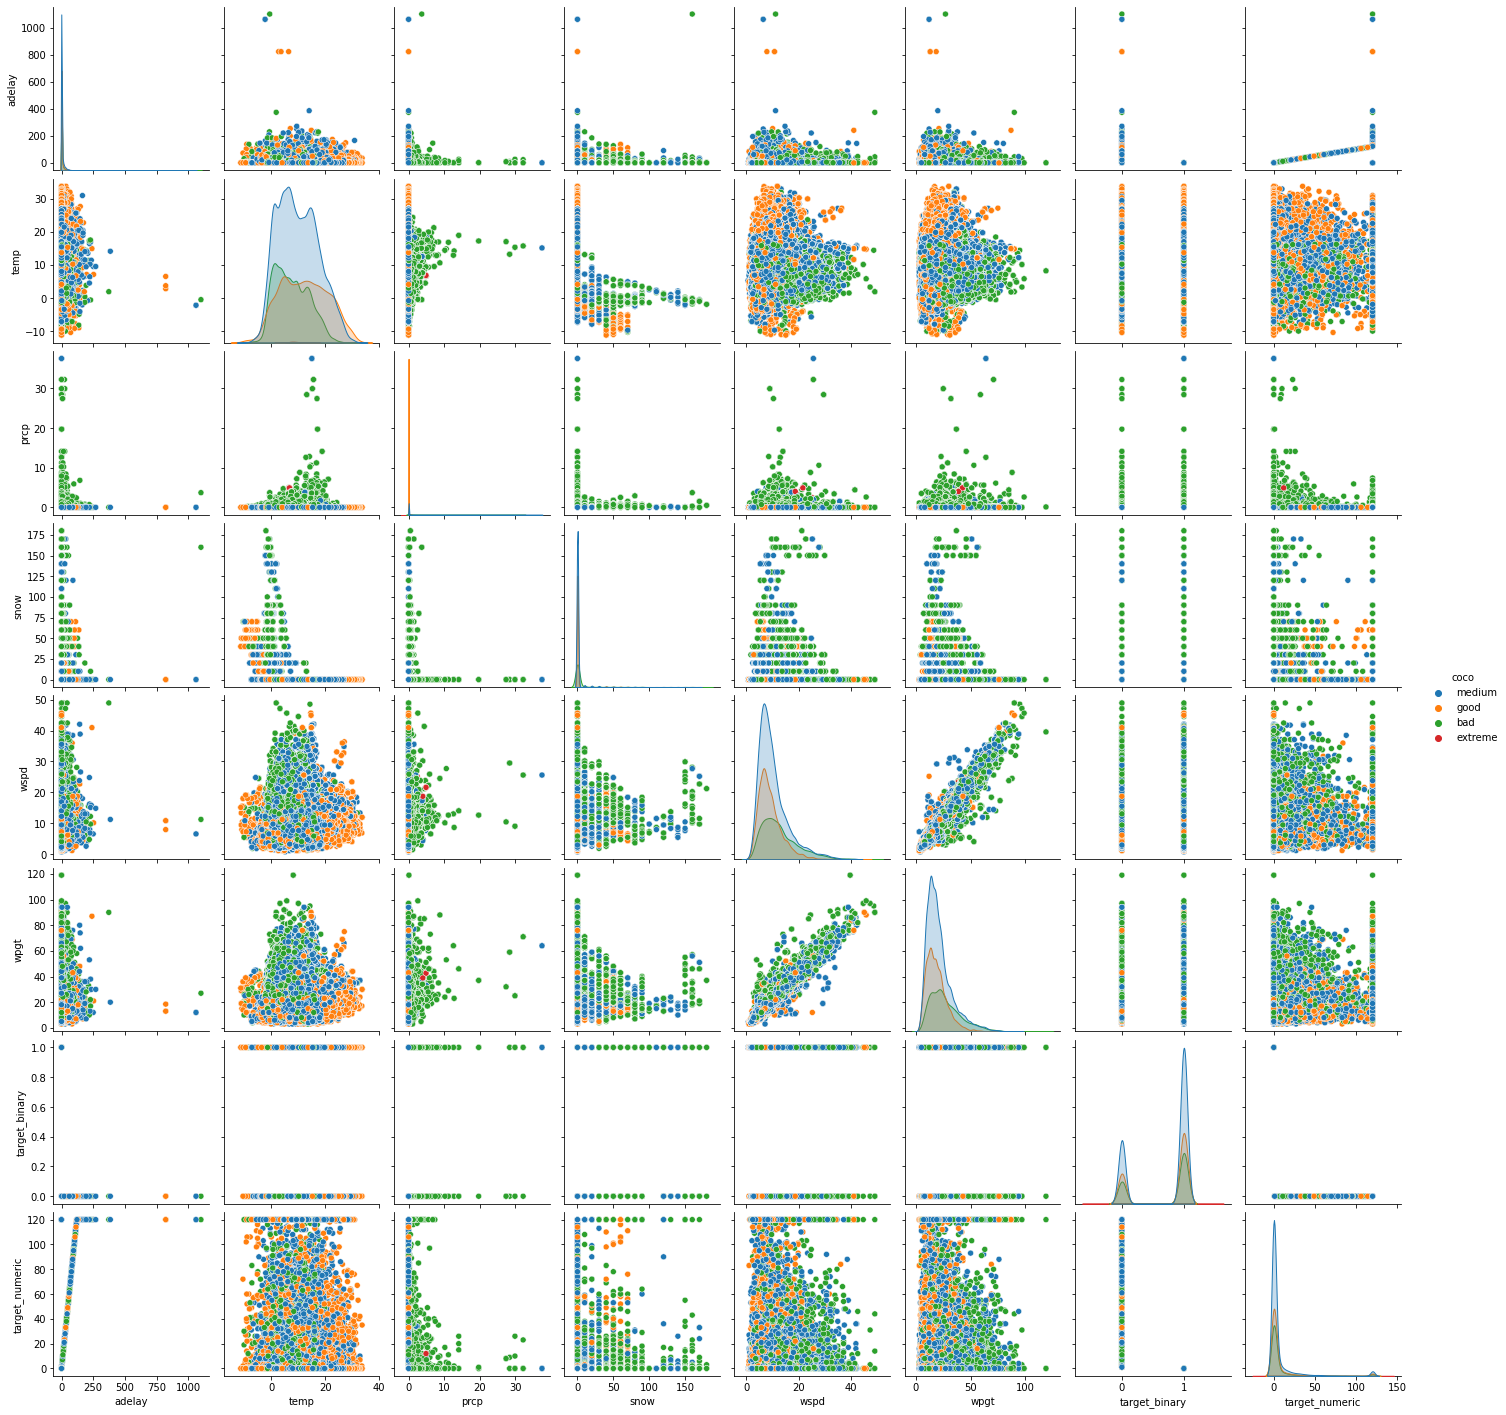

In [112]:
sns.pairplot(df[df['city'] == 'München'], hue='coco');

# Summary

In [ ]:
# Load dataframe and exclude columns we're not interested in
df = pd.read_csv('../raw_data/KM_test.csv').drop(columns=['Unnamed: 0', 'datum', 'arrTime', 'start_or_endpoint', 
                                                          'depTime', 'zugnr', 'bhf', 'ddelay', 'arrTime_clean', 
                                                          'depTime_clean', 'dwpt', 'rhum', 'wdir', 'pres', 'tsun'])
# Rename this coumn for better understanding
df.rename(columns={'date': 'expected_atime'}, inplace=True)

# Load coco file
coco = pd.read_csv('../raw_data/weather_coco.csv', sep=';')
coco.set_index('Code', inplace=True)
coco = coco.to_dict()['Weather Condition']

# Define new classification for coco
new_classes = {
    'good': [1, 2],
    'medium': [3, 4, 7, 14],
    'bad': [5, 8, 10, 12, 15, 17, 19, 21, 23, 24, 25],
    'extreme': [6, 9, 11, 13, 16, 18, 20, 22, 26, 27]
}

# Apply new classification for coco
reclass = {}
for k, values in new_classes.items():
    for v in values:
        for c in range(1, 28):
            if v == c:
                reclass[v] = k

reclass = dict(sorted(reclass.items()))
df['coco'] = df['coco'].map(reclass)

In [127]:
df

,adelay,city,expected_atime,sharp_date,temp,prcp,snow,wspd,wpgt,coco,target,target_binary,target_numeric
0,0,Köln,2019-12-15 19:06:00,2019-12-15 19:00:00,6.9,0.0,0.0,13.3,21.0,medium,on time,1,0
1,10,Köln,2019-12-16 19:06:00,2019-12-16 19:00:00,8.7,0.0,0.0,11.5,18.0,medium,medium delay,0,10
2,47,Köln,2019-12-17 19:06:00,2019-12-17 19:00:00,14.8,0.0,0.0,18.4,30.0,medium,large delay/cancelled,0,47
3,-1,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good,large delay/cancelled,0,120
4,29,Köln,2019-12-18 19:06:00,2019-12-18 19:00:00,7.5,0.0,0.0,17.3,28.0,good,medium delay,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130274,0,München,2022-05-11 07:11:00,2022-05-11 07:00:00,19.8,0.0,0.0,9.4,18.0,medium,on time,1,0
130275,21,München,2022-05-12 07:11:00,2022-05-12 07:00:00,21.4,0.0,0.0,15.5,32.0,medium,medium delay,0,21
130276,0,München,2022-05-13 07:11:00,2022-05-13 07:00:00,15.8,0.7,0.0,5.8,12.0,bad,on time,1,0
130277,0,München,2022-05-14 07:11:00,2022-05-14 07:00:00,15.4,0.0,0.0,2.2,5.0,medium,on time,1,0
